# Bank Telemarketing 

In [125]:
#import linear algebra and data manipulation libraries
import numpy as np
import pandas as pd

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import special visualization
import plotly.express as px


#import machine learning
""" from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB """

#import xgboost

""" from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV """

import os
print(os.listdir("..\BankMarketingData\\resources"))

['bank-additional-full.csv', 'bank-additional-names.txt']


## Business Goals:

Is the telemarketing campaign making any effect?

What features are affecting the marketing campaign and converting to 'Yes' rather than 'No'

Finding out customer profiles who subscribed to term deposit, for targetted campaigns.


In [126]:
#importing the dataset
rawdata = pd.read_csv('..\BankMarketingData\\resources\\bank-additional-full.csv',sep=';') 
#dropping the duration, because after the end of the call, the output is usually known.
#pdays = 999, means customer not contacted for a previous campaign. 92% of data is this. So it can be dropped.
#does not add significant value
rawdata = rawdata.drop(['duration','pdays'], axis=1)
#displaying the table
rawdata.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Exploration

In [127]:
#number of rows and columns in dataset
print("Bank marketing dataset consists of {rows} rows and {cols} columns.".format(rows = rawdata.shape[0], cols = rawdata.shape[1]))

Bank marketing dataset consists of 41188 rows and 19 columns.


In [128]:
#checking for missing values for each individual columns
missing_values = rawdata.isnull().mean()*100
print("Total number of missing values {missing}.".format(missing = missing_values.sum()))

#checking for duplicate rows for dataset
dup_rows = rawdata.duplicated().sum()
print("Total number of duplicated rows {dupes}.".format(dupes = dup_rows))

#removing duplicate rows from rawdata
rawdata = rawdata[~rawdata.duplicated()]
print("Bank marketing dataset now consists of {rows} rows and {cols} columns.".format(rows = rawdata.shape[0], cols = rawdata.shape[1]))

Total number of missing values 0.0.
Total number of duplicated rows 1795.
Bank marketing dataset now consists of 39393 rows and 19 columns.


### Looking at the histograms of categorical columns

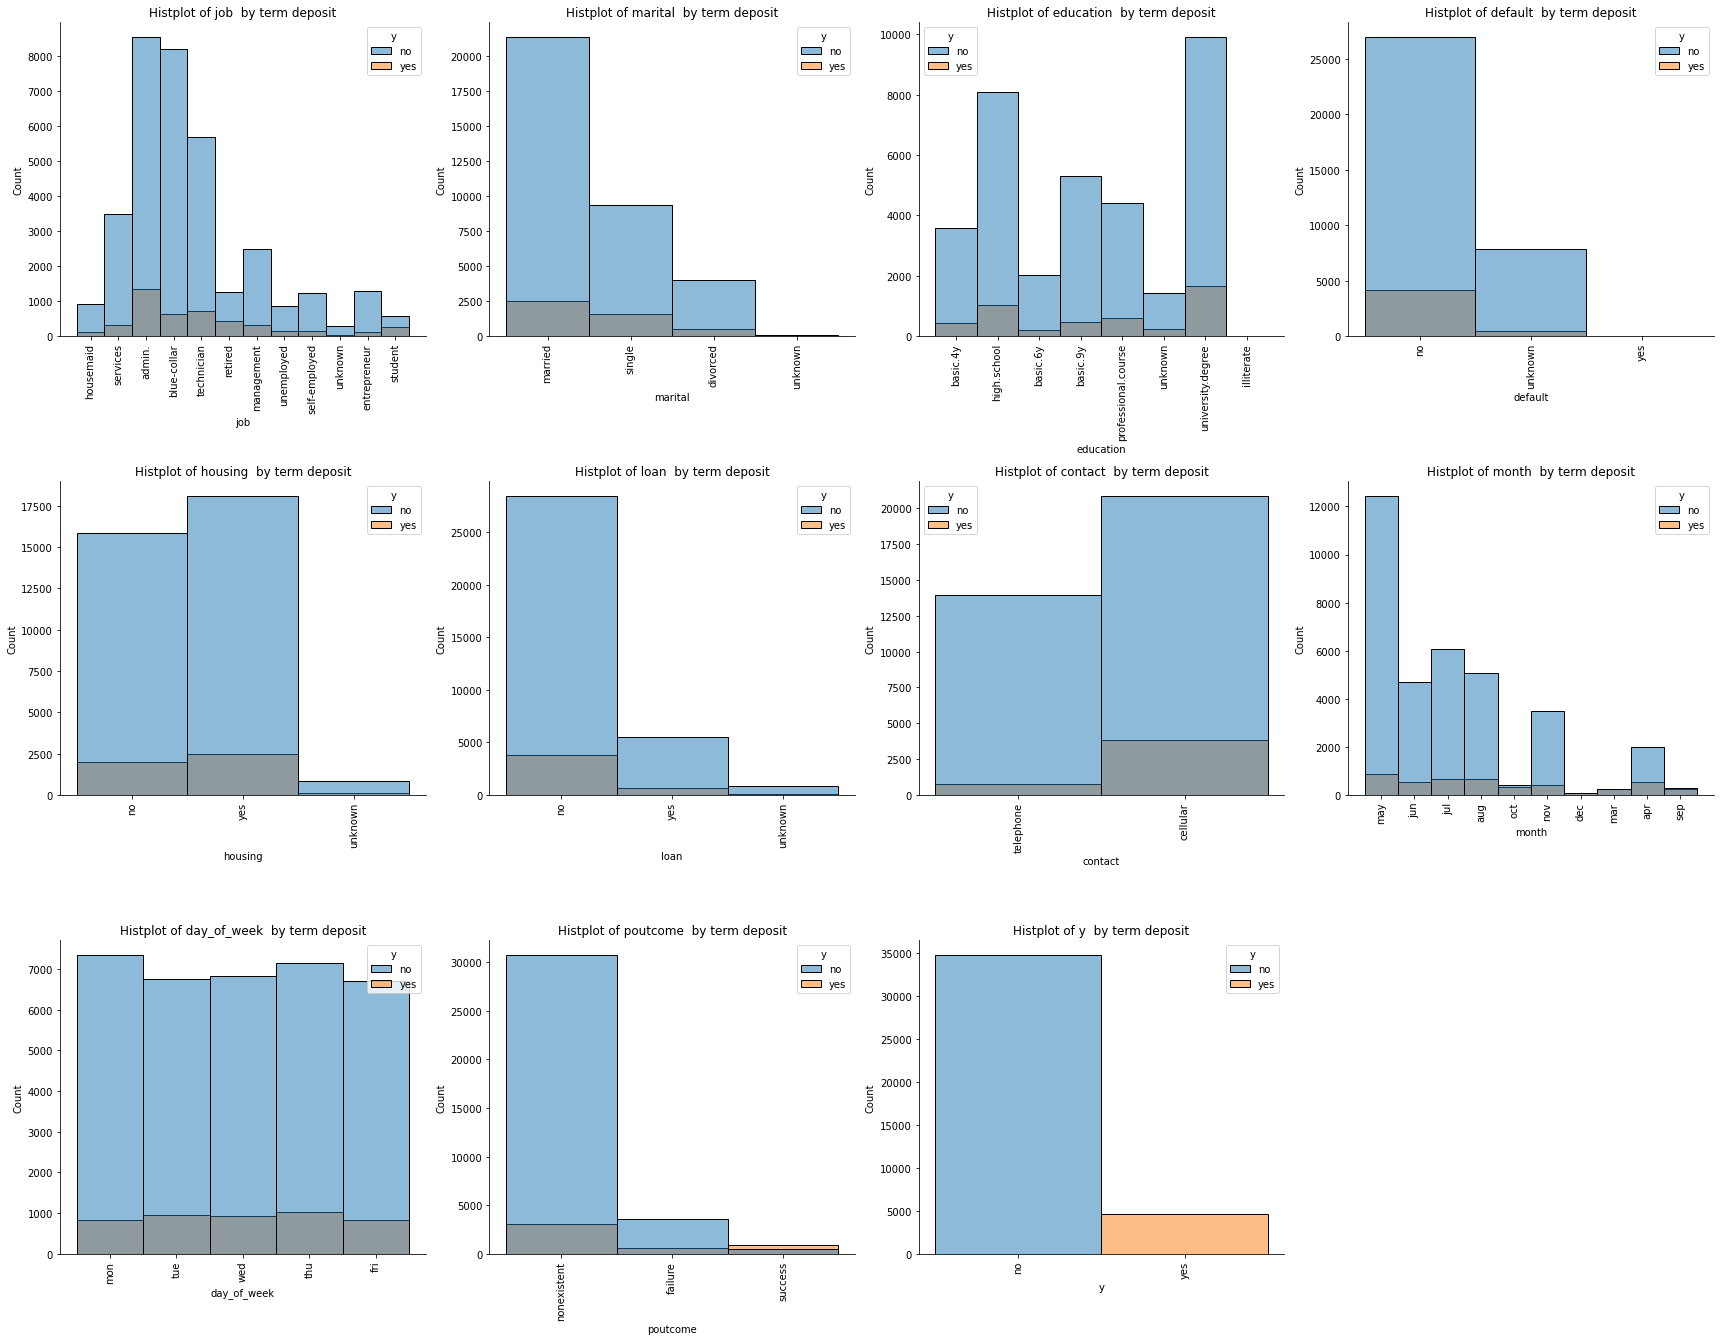

In [129]:
#We extract the categorical column types and display in histograms
categorical_features = rawdata.columns[rawdata.dtypes=='object']

plt.figure(figsize=[24,24])
n=1
for f in categorical_features:
    plt.subplot(4,4,n)
    h = sns.histplot(data=rawdata, x=f, hue="y")
    for item in h.get_xticklabels():
        item.set_rotation(90)
    #sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=rawdata)
    sns.despine()
    plt.title("Histplot of {}  by term deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()




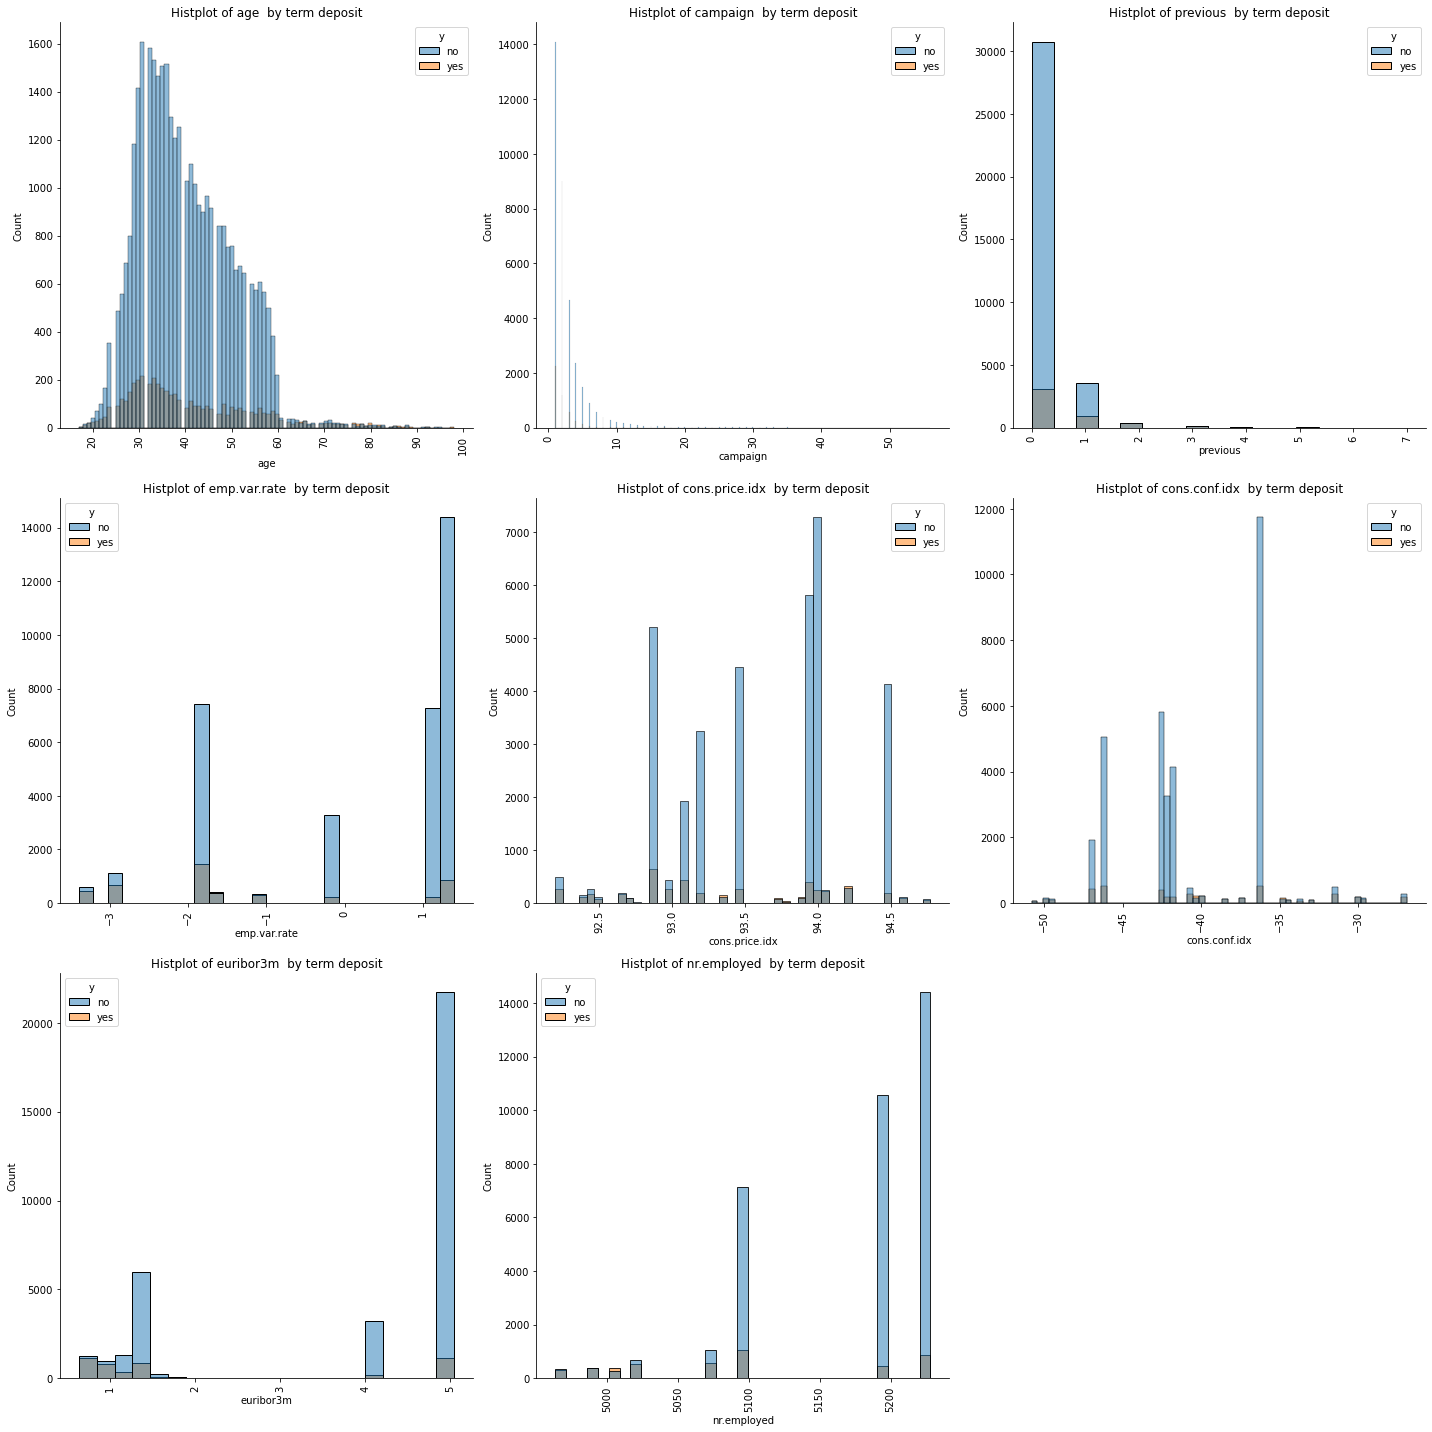

In [130]:
numerical_features = rawdata.columns[~(rawdata.dtypes=='object')]
#print(numerical_features)

#Histogram plots to get an idea about the outliers and distribution for numerical data.
plt.figure(figsize=[20,20])
n=1
for f in numerical_features:
    plt.subplot(3,3,n)
    h = sns.histplot(data=rawdata, x=f, hue="y")
    for item in h.get_xticklabels():
        item.set_rotation(90)
    #sns.countplot(x=f, hue='y', edgecolor="black", alpha=0.7, data=rawdata)
    sns.despine()
    plt.title("Histplot of {}  by term deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()





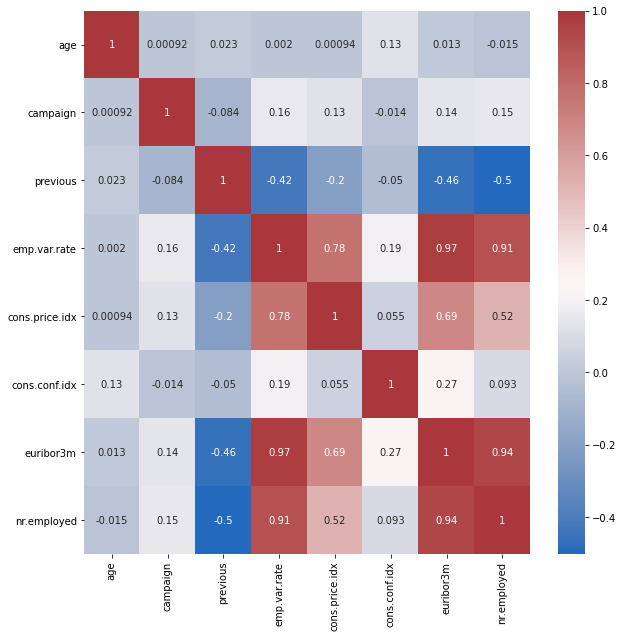

In [131]:

#Scatterplots to search for linear and non-linear relationships and histograms for numerical data
#Warning: Takes a long long time 
""" plt.figure(figsize=[24,24])
h = sns.pairplot(rawdata, vars=['age', 'campaign', 'pdays', 'previous'], diag_kind='hist',  hue= 'y', height=1.5, 
             diag_kws={"edgecolor":"k", "alpha":0.5},
             plot_kws={"alpha":0.5})
plt.show() """


#Pearson’s Correlations, which measures the strength of a linear relationship

plt.figure(figsize=[10,10])
h = sns.heatmap(rawdata.corr(method='pearson'), cmap="vlag",cbar=True, annot=True) 
# cmaps = "Spectral", "coolwarm", "greys", "rocket", "vlag", "icefire"
plt.show()


In [132]:
#Practice on generate a normalized stacked barplot using plotly for job

"""subset01 = rawdata[["job", "y"]]
subset01["count"] = np.ones(len(subset01))
#subset01.head()

df1 = subset01.groupby(["job","y"]).agg({'count':'sum'})
df2 = df1.unstack()
#making a wide table
df2_cpy = df2.copy()
df2_cpy.columns = ['__'.join(col).strip() for col in df2.columns.values]
df2_cpy.reset_index(inplace=True) # Resets the index, makes factor a column

#making a long table
df3 = pd.melt(df2_cpy,id_vars="job",value_vars=["count__no", "count__yes"], var_name="y")

#plotting both wide table and long table in plotly
fig = px.bar(df2_cpy, x="job", y=["count__no", "count__yes"], title="Wide-Form Input")
fig.show()
fig = px.bar(df3, x="job", y="value", color="y", title="Long-Form Input")
fig.show() 

df2_cpy["prop__no"] = df2_cpy["count__no"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
df2_cpy["prop__yes"] = df2_cpy["count__yes"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
df2_cpy["ones"] = np.ones(len(df2_cpy))

#normalized stacked barplot using plotly
fig = px.bar(df2_cpy, x="job", y=["prop__no", "prop__yes"], title="Wide-Form Input")
fig.show()"""



'subset01 = rawdata[["job", "y"]]\nsubset01["count"] = np.ones(len(subset01))\n#subset01.head()\n\ndf1 = subset01.groupby(["job","y"]).agg({\'count\':\'sum\'})\ndf2 = df1.unstack()\n#making a wide table\ndf2_cpy = df2.copy()\ndf2_cpy.columns = [\'__\'.join(col).strip() for col in df2.columns.values]\ndf2_cpy.reset_index(inplace=True) # Resets the index, makes factor a column\n\n#making a long table\ndf3 = pd.melt(df2_cpy,id_vars="job",value_vars=["count__no", "count__yes"], var_name="y")\n\n#plotting both wide table and long table in plotly\nfig = px.bar(df2_cpy, x="job", y=["count__no", "count__yes"], title="Wide-Form Input")\nfig.show()\nfig = px.bar(df3, x="job", y="value", color="y", title="Long-Form Input")\nfig.show() \n\ndf2_cpy["prop__no"] = df2_cpy["count__no"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])\ndf2_cpy["prop__yes"] = df2_cpy["count__yes"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])\ndf2_cpy["ones"] = np.ones(len(df2_cpy))\n\n#normalized stacked barplot usi

In [133]:
#plotting normalized stacked bar plots for all categorical features

numerical_features = rawdata.columns[~(rawdata.dtypes=='object')]

plt.figure(figsize=[24,24])
n=1
for f in numerical_features:
    subset01 = rawdata[[f, "y"]]
    subset01["count"] = np.ones(len(subset01))
    df1 = subset01.groupby([f,"y"]).agg({'count':'sum'})
    df2 = df1.unstack()
    #making a wide table
    df2_cpy = df2.copy()
    df2_cpy.columns = ['__'.join(col).strip() for col in df2.columns.values]
    df2_cpy.reset_index(inplace=True) # Resets the index, makes factor a column
    df2_cpy["prop__no"] = df2_cpy["count__no"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
    df2_cpy["prop__yes"] = df2_cpy["count__yes"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
    df2_cpy["ones"] = np.ones(len(df2_cpy))

    #normalized stacked barplot using plotly
    fig = px.bar(df2_cpy, x=f, y=["prop__no", "prop__yes"],width=600, height=300)
    fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white")
    fig.show()
    #for item in fig.get_xticklabels():
     #   item.set_rotation(90)
    n=n+1
plt.tight_layout()
plt.show()

<Figure size 1728x1728 with 0 Axes>

In [134]:
#plotting normalized stacked bar plots for all numerical features

categorical_features = rawdata.columns[rawdata.dtypes=='object']
categorical_features = np.delete(categorical_features,[(len(categorical_features)-1)],None)

n=1
for f in categorical_features:
    subset01 = rawdata[[f, "y"]]
    subset01["count"] = np.ones(len(subset01))
    df1 = subset01.groupby([f,"y"]).agg({'count':'sum'})
    df2 = df1.unstack()
    #making a wide table
    df2_cpy = df2.copy()
    df2_cpy.columns = ['__'.join(col).strip() for col in df2.columns.values]
    df2_cpy.reset_index(inplace=True) # Resets the index, makes factor a column
    df2_cpy["prop__no"] = df2_cpy["count__no"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
    df2_cpy["prop__yes"] = df2_cpy["count__yes"] / (df2_cpy["count__yes"] + df2_cpy["count__no"])
    df2_cpy["ones"] = np.ones(len(df2_cpy))

    #normalized stacked barplot using plotly
    fig = px.bar(df2_cpy, x=f, y=["prop__no", "prop__yes"],width=600, height=300)
    fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="white")
    fig.show()
    #for item in fig.get_xticklabels():
     #   item.set_rotation(90)
    n=n+1
